In [3]:
%pip install opencv-python-headless
%pip install numpy pillow matplotlib

   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
    --------------------------------------- 0.8/38.9 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.8/38.9 MB 4.1 MB/s eta 0:00:10
   --- ------------------------------------ 3.1/38.9 MB 4.9 MB/s eta 0:00:08
   ---- ----------------------------------- 4.5/38.9 MB 5.2 MB/s eta 0:00:07
   ----- ---------------------------------- 5.5/38.9 MB 5.4 MB/s eta 0:00:07
   ------- -------------------------------- 7.3/38.9 MB 5.6 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.9 MB 5.7 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/38.9 MB 5.5 MB/s eta 0:00:06
   ---------- ----------------------------- 10.5/38.9 MB 5.4 MB/s eta 0:00:06
   ------------ --------------------------- 11.8/38.9 MB 5.5 MB/s eta 0:00:05
   ------------ --------------------------- 12.6/38.9 MB 5.3 MB/s eta 0:00:05
   -------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


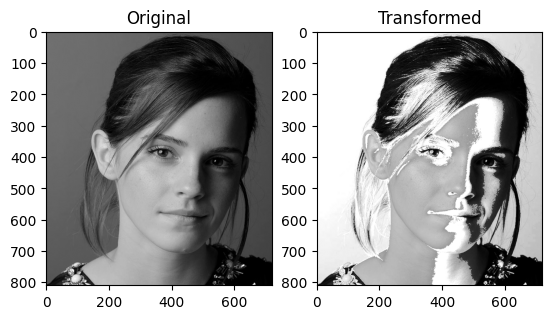

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image (grayscale)
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\emma.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")


# Create lookup table (LUT) for intensity mapping
LUT = np.zeros(256, dtype=np.uint8)

for input_intensity in range(256):
    if input_intensity < 50:
        out_intensity = input_intensity  #Same as input intensity
    elif input_intensity == 50:
        out_intensity = np.random.randint(50, 100)  # Random value between 50 and 100
    elif input_intensity > 50 and input_intensity <150 :
        out_intensity = (255 - 150) / (150 - 100) * (input_intensity ) + 50  # slope 2.1 approx
    elif input_intensity == 150:    
        out_intensity = np.random.randint(155, 255) # Random value between 155 and 255
    else:
        out_intensity = input_intensity # Same as input intensity
    
    LUT[input_intensity] = np.clip(out_intensity, 0, 255)

# Apply transformation using LUT
transformed = cv2.LUT(img, LUT)

# Display results
plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(transformed, cmap="gray"), plt.title("Transformed")
plt.show()


Q2

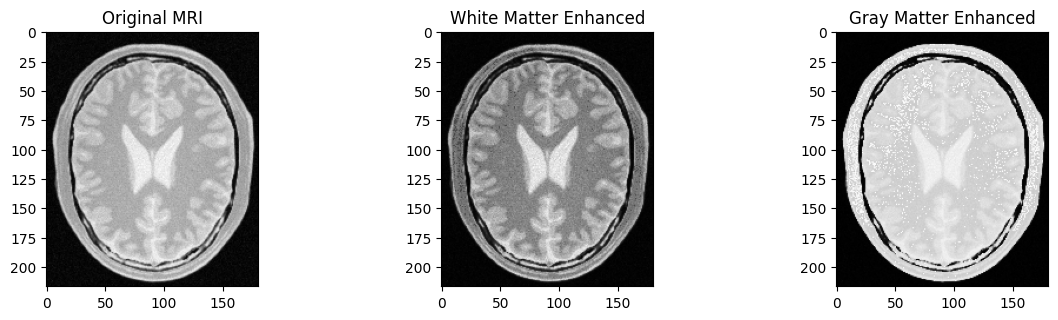

In [ ]:
# Load MRI image (grayscale)
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

# ----- White matter enhancement -----
LUT_white = np.zeros(256, dtype=np.uint8)
for r in range(256):
    if r < 150:
        s = int(r * 0.5)   # compress dark range
    else:
        s = int((r - 150) * (255-100)/(255-150) + 100)  # stretch bright range
    LUT_white[r] = np.clip(s, 0, 255)

white_enhanced = cv2.LUT(img, LUT_white)

# ----- Gray matter enhancement -----
LUT_gray = np.zeros(256, dtype=np.uint8)
for r in range(256):
    if r < 80:
        s = int(r * 0.3)   # compress low intensities
    elif r < 160:
        s = int((r - 80) * (255-50)/(160-80) + 50)  # stretch mid range
    else:
        s = int((r - 160) * 0.5 + 200)  # compress high intensities
    LUT_gray[r] = np.clip(s, 0, 255)

gray_enhanced = cv2.LUT(img, LUT_gray)

# ----- Plot results -----
plt.figure(figsize=(12,6))

plt.subplot(2,3,1), plt.imshow(img, cmap="gray"), plt.title("Original MRI")
plt.subplot(2,3,2), plt.imshow(white_enhanced, cmap="gray"), plt.title("White Matter Enhanced")
plt.subplot(2,3,3), plt.imshow(gray_enhanced, cmap="gray"), plt.title("Gray Matter Enhanced")


plt.tight_layout()
plt.show()


Q3


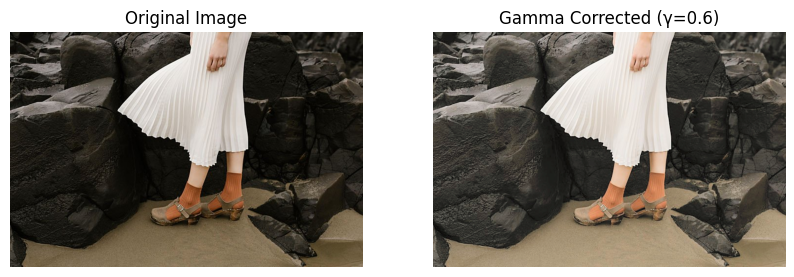

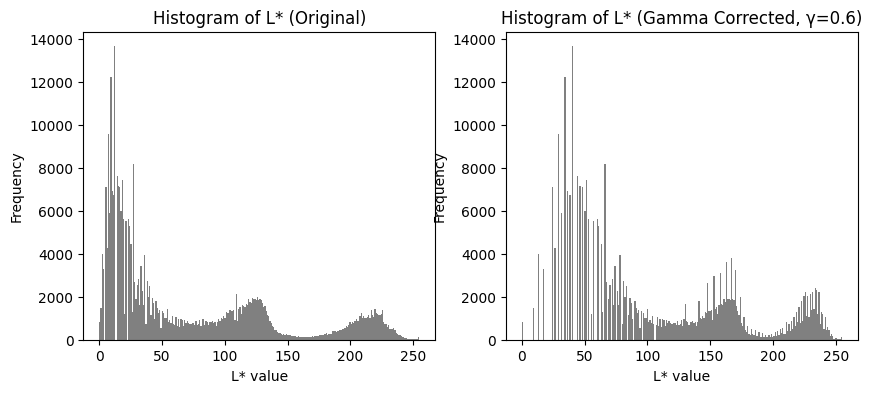

In [5]:

# Load the image
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\highlights_and_shadows.jpg")
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB for display

# Convert RGB → Lab
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(lab)

# Normalize L (0–100 range for Lab, OpenCV stores L in 0–255)
L_norm = L / 255.0

# Apply gamma correction
gamma = 0.6   # <--- state your gamma value
L_corr = np.clip((L_norm ** gamma) * 255.0, 0, 255).astype(np.uint8)

# Merge back corrected L with a and b
lab_corr = cv2.merge([L_corr, a, b])

# Convert back to RGB
img_corr = cv2.cvtColor(lab_corr, cv2.COLOR_LAB2RGB)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_corr)
plt.title(f"Gamma Corrected (γ={gamma})")
plt.axis("off")

plt.show()

# ---------- Histograms of L ----------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(L.flatten(), bins=256, range=(0,255), color='gray')
plt.title("Histogram of L* (Original)")
plt.xlabel("L* value")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(L_corr.flatten(), bins=256, range=(0,255), color='gray')
plt.title(f"Histogram of L* (Gamma Corrected, γ={gamma})")
plt.xlabel("L* value")
plt.ylabel("Frequency")

plt.show()


Q4

Chosen value of a: 0.7


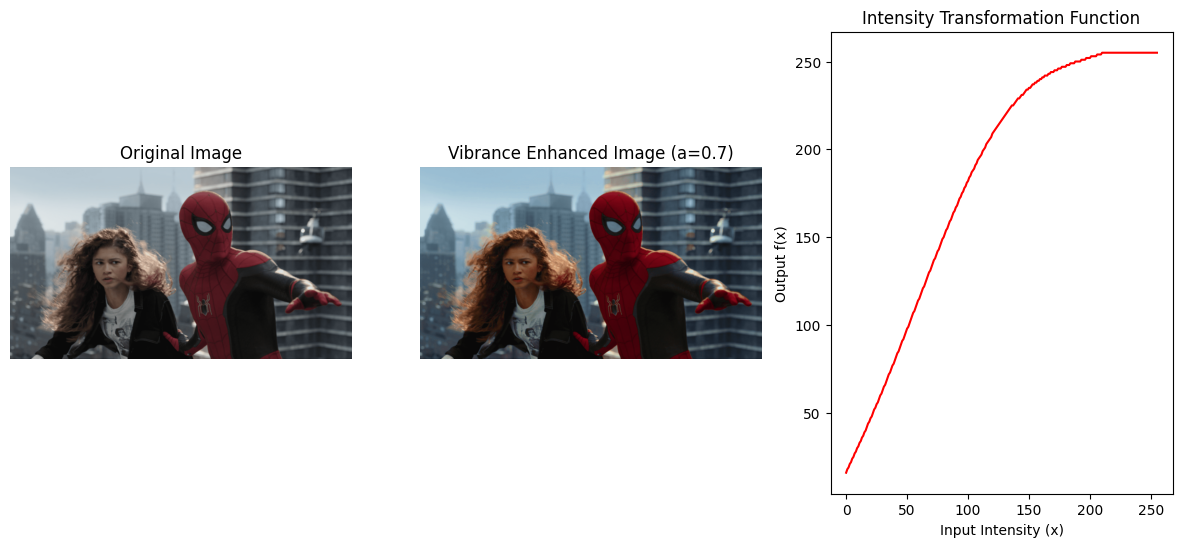

In [6]:

# Load the image
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\spider.png")
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# (a) Convert to HSV and split planes
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

# (b) Apply intensity transformation to saturation plane
sigma = 70
a = 0.7   # <--- adjust this value to get visually pleasing output
x = np.arange(0, 256)

# Transformation function f(x)
f = lambda x: np.minimum(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

# Create lookup table
lookup = np.array([f(val) for val in range(256)]).astype(np.uint8)

# Apply lookup table to saturation plane
s_transformed = cv2.LUT(s, lookup)

# (c) Report chosen value of a
print("Chosen value of a:", a)

# (d) Recombine planes
hsv_enhanced = cv2.merge([h, s_transformed, v])
img_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2RGB)

# ---------- (e) Display ----------
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_enhanced)
plt.title(f"Vibrance Enhanced Image (a={a})")
plt.axis("off")

plt.subplot(1,3,3)
plt.plot(x, lookup, color='red')
plt.title("Intensity Transformation Function")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output f(x)")

plt.show()


Q5

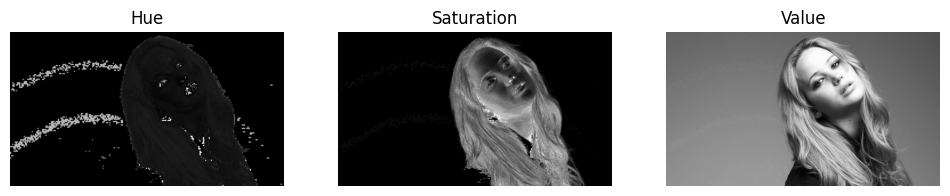

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\jeniffer.jpg")
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # For correct display with matplotlib


## Part a
# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

# Display Hue, Saturation, Value separately
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(h, cmap='gray')
plt.title("Hue")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray')
plt.title("Saturation")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray')
plt.title("Value")
plt.axis("off")

plt.show()





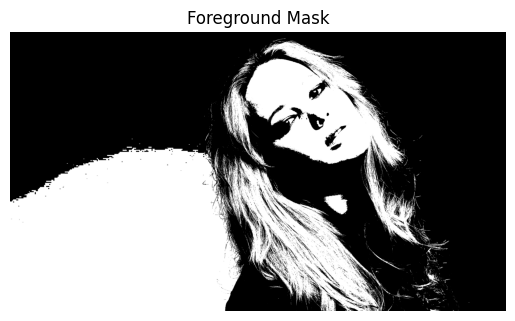

In [4]:
# Threshold the Value plane (can also try Saturation)
_, mask = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis("off")
plt.show()


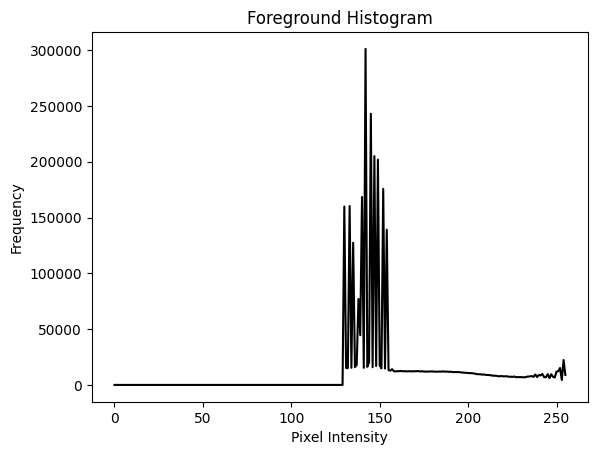

In [5]:
foreground = cv2.bitwise_and(v, v, mask=mask)

# Compute histogram of foreground only
hist = cv2.calcHist([foreground], [0], mask, [256], [0,256])

plt.plot(hist, color='black')
plt.title("Foreground Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


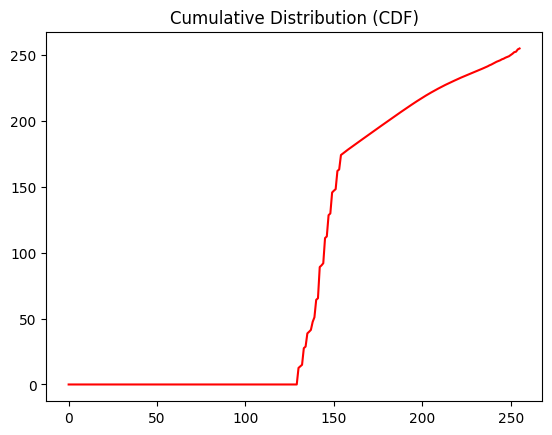

In [8]:
cdf = np.cumsum(hist)
cdf_normalized = cdf * (255 / cdf[-1])   # Normalize to [0,255]

plt.plot(cdf_normalized, color='red')
plt.title("Cumulative Distribution (CDF)")
plt.show()


Formulae for histogram equilization

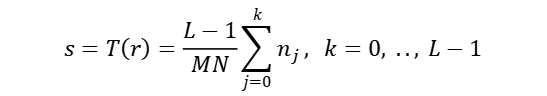

In [9]:
# (e) Apply histogram equalization formula
L = 256
M, N = foreground.shape
cdf_normalized = np.floor(((L-1) / (M*N)) * cdf).astype(np.uint8)

# Create lookup table
lookup = cdf_normalized

# Apply mapping only to foreground
equalized_foreground = lookup[foreground]

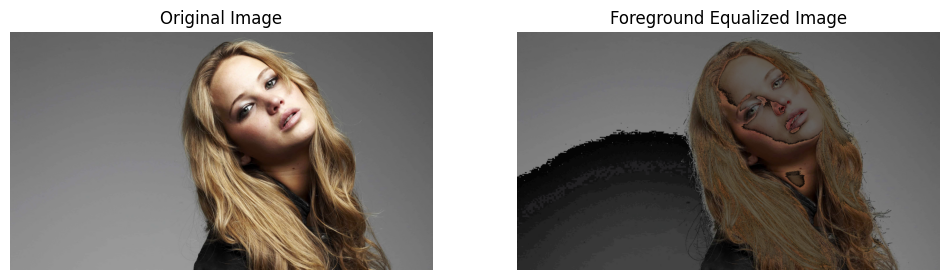

In [10]:
# (f) Combine with background
background = cv2.bitwise_and(v, v, mask=cv2.bitwise_not(mask))
v_equalized = cv2.add(background, equalized_foreground)

# Merge back to HSV → RGB
hsv_equalized = cv2.merge([h, s, v_equalized])
result = cv2.cvtColor(hsv_equalized, cv2.COLOR_HSV2RGB)

# -------- Display --------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Foreground Equalized Image")
plt.axis("off")

plt.show()

Q7

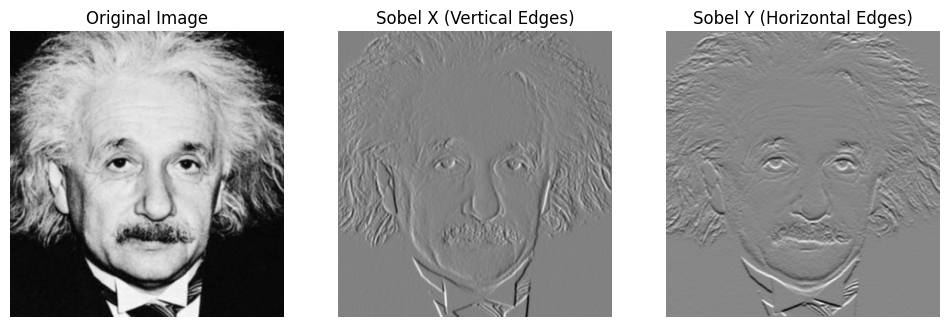

In [12]:

# Load image in grayscale
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\einstein.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]], dtype=np.float32)

# Apply filter2D with Sobel kernels
grad_x = cv2.filter2D(img, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, sobel_y)


# ---------- Display ----------
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grad_x, cmap='gray')
plt.title("Sobel X (Vertical Edges)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(grad_y, cmap='gray')
plt.title("Sobel Y (Horizontal Edges)")
plt.axis("off")



plt.show()


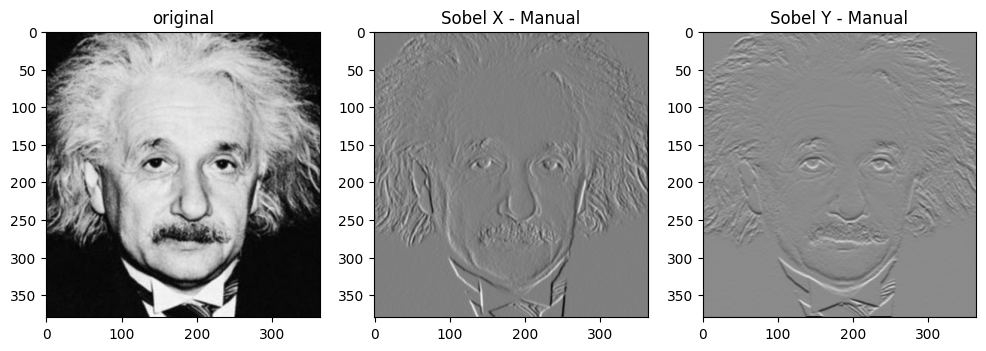

In [15]:

def convolve(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # pad image with zeros
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(img, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

# Apply manual convolution
grad_x = convolve(img, sobel_x)
grad_y = convolve(img, sobel_y)

# Display results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img, cmap="gray"), plt.title("original")
plt.subplot(1,3,2), plt.imshow(grad_x, cmap="gray"), plt.title("Sobel X - Manual")
plt.subplot(1,3,3), plt.imshow(grad_y, cmap="gray"), plt.title("Sobel Y - Manual")

plt.show()


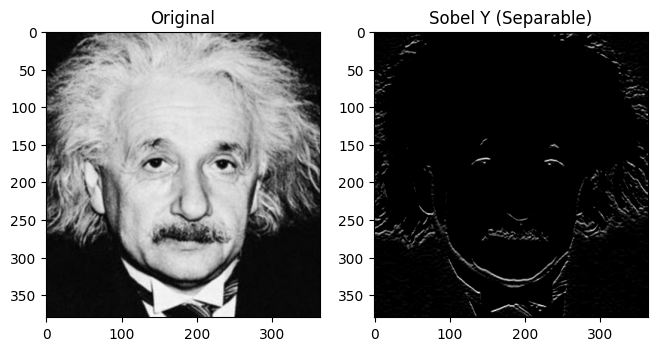

In [18]:


kx_y = np.array([[1, 2, 1]], dtype=np.float32)   # horizontal
ky_y = np.array([[1], [0], [-1]], dtype=np.float32) # vertical

# Apply separable convolution for Y
intermediate_y = cv2.filter2D(img, -1, kx_y)
sobel_y = cv2.filter2D(intermediate_y, -1, ky_y)


# Show results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(sobel_y, cmap="gray"), plt.title("Sobel Y (Separable)")
plt.show()


Q7

In [10]:
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\a1q8images\im02small.png") 
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")  

print(img.shape)

img2 = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\a1q8images\im02.png") 
if img2 is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")  

print(img2.shape)

(300, 480, 3)
(1200, 1920, 3)


Normalized SSD (Nearest): 0.018320
Normalized SSD (Bilinear): 0.018320


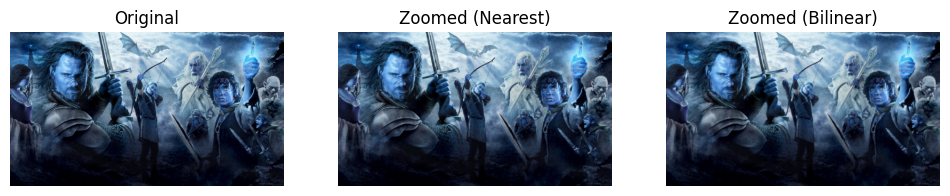

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(img, scale, method):

    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    
    # Prepare empty output
    zoomed = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
    
    for i in range(new_h):
        for j in range(new_w):
            # Map back to original image coordinates
            x = i / scale
            y = j / scale
            
            if method == "nearest":
                # Round to nearest pixel
                x_near = int(round(x))
                y_near = int(round(y))
                x_near = min(x_near, h - 1)
                y_near = min(y_near, w - 1)
                zoomed[i, j] = img[x_near, y_near]
            
            elif method == "bilinear":
                # Bilinear Interpolation
                x0, y0 = int(np.floor(x)), int(np.floor(y))
                x1, y1 = min(x0 + 1, h - 1), min(y0 + 1, w - 1)
                
                dx, dy = x - x0, y - y0
                
                top = (1 - dy) * img[x0, y0] + dy * img[x0, y1]
                bottom = (1 - dy) * img[x1, y0] + dy * img[x1, y1]
                zoomed[i, j] = (1 - dx) * top + dx * bottom
    
    return zoomed

def normalized_ssd(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    diff = img1 - img2
    ssd = np.sum(diff ** 2)
    norm_ssd = ssd / np.sum(img1 ** 2)
    return norm_ssd



small_img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\a1q8images\im01small.png") 
if small_img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")  
small_img.shape

scale = 4.0  # test zoom factor

# (a) Nearest Neighbor
zoomed_nearest = zoom_image(small_img, scale, method="nearest")
# (b) Bilinear
zoomed_bilinear = zoom_image(small_img, scale, method="bilinear")

large_img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\a1q8images\im01.png") 
if large_img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.") 


# Resize nn_resized to match img's shape for SSD comparison
large_resized_to_small = cv2.resize(large_img, (small_img.shape[1], small_img.shape[0]), interpolation=cv2.INTER_NEAREST)

# Compute SSD
nssd_nn = normalized_ssd(small_img, large_resized_to_small)
nssd_bilinear = normalized_ssd(small_img, large_resized_to_small)

print(f"Normalized SSD (Nearest): {nssd_nn:.6f}")
print(f"Normalized SSD (Bilinear): {nssd_bilinear:.6f}")

# Show results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(small_img); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(zoomed_nearest); plt.title("Zoomed (Nearest)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(zoomed_bilinear); plt.title("Zoomed (Bilinear)"); plt.axis("off")
plt.show()


Q8

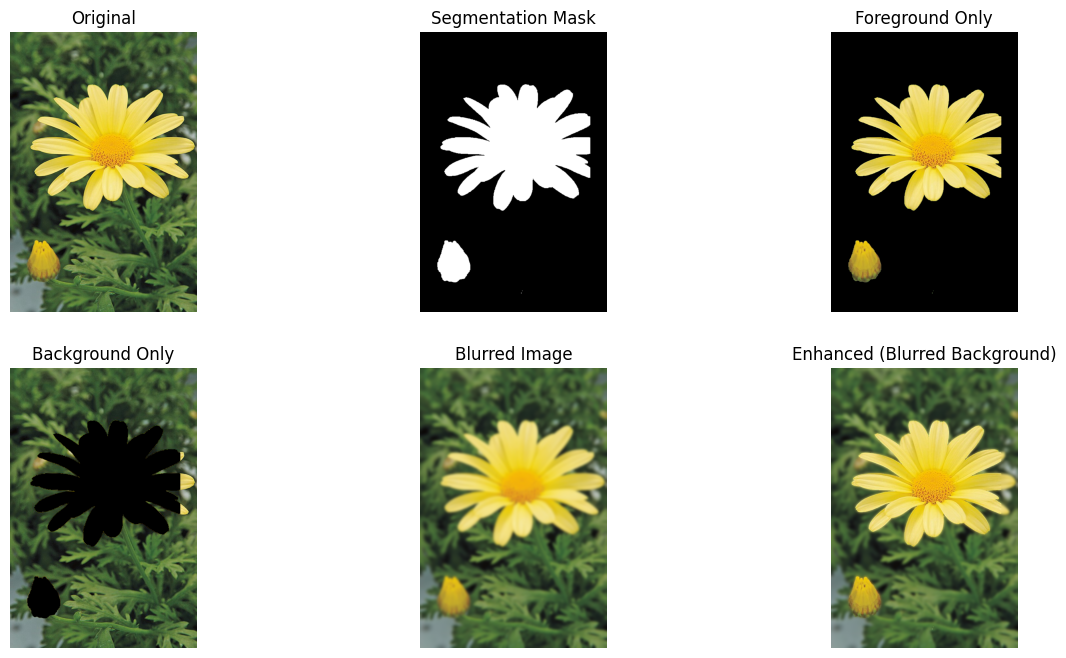

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
daisy_img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\daisy.jpg")  

if daisy_img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

daisy_img = cv2.cvtColor(daisy_img, cv2.COLOR_BGR2RGB)

# Initialize mask
mask = np.zeros(daisy_img.shape[:2], np.uint8)

# Define rectangle (rough bounding box around flower)
rect = (50, 50, daisy_img.shape[1]-100, daisy_img.shape[0]-100)  

# Allocate memory for models
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# Run GrabCut
cv2.grabCut(daisy_img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Binary mask: foreground = 1, background = 0
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# Extract foreground & background
foreground = daisy_img * mask2[:, :, np.newaxis]
background = daisy_img * (1 - mask2[:, :, np.newaxis])

# Create blurred background
blurred = cv2.GaussianBlur(daisy_img, (21,21), 0)
enhanced = foreground + blurred * (1 - mask2[:, :, np.newaxis])

# ---------- Display ----------
plt.figure(figsize=(15,8))

plt.subplot(2,3,1); plt.imshow(daisy_img); plt.title("Original"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(mask2*255, cmap="gray"); plt.title("Segmentation Mask"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(foreground); plt.title("Foreground Only"); plt.axis("off")
plt.subplot(2,3,4); plt.imshow(background); plt.title("Background Only"); plt.axis("off")


plt.subplot(2,3,5); plt.imshow(blurred); plt.title("Blurred Image"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(enhanced); plt.title("Enhanced (Blurred Background)"); plt.axis("off")

plt.show()


Q9

Number of rice grains detected: 74


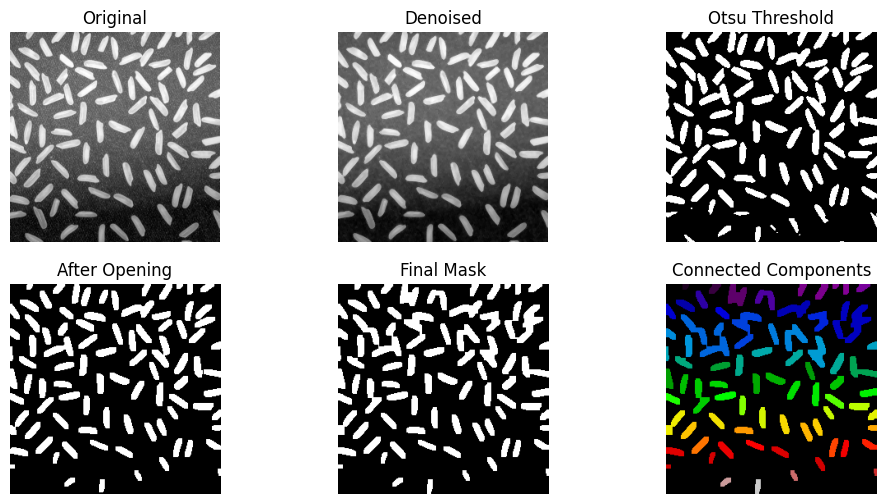

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load rice images
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\rice.png", cv2.IMREAD_GRAYSCALE)  # Fig. 8a



if rice1 is None or rice2 is None:
	raise FileNotFoundError("Rice image(s) not found. Please check the path and filename.")

denoised = cv2.medianBlur(img, 3)  # denoising step from (a)/(b)

# (c) Otsu's thresholding
_, otsu_thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# (d) Morphological operations
kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(otsu_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
cleaned = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=2)

# (e) Connected components
num_labels, labels = cv2.connectedComponents(cleaned)
print("Number of rice grains detected:", num_labels - 1)

# ---------- Display ----------
plt.figure(figsize=(12,6))

plt.subplot(2,3,1); plt.imshow(img, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(denoised, cmap="gray"); plt.title("Denoised"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(otsu_thresh, cmap="gray"); plt.title("Otsu Threshold"); plt.axis("off")
plt.subplot(2,3,4); plt.imshow(opened, cmap="gray"); plt.title("After Opening"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(cleaned, cmap="gray"); plt.title("Final Mask"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(labels, cmap="nipy_spectral"); plt.title("Connected Components"); plt.axis("off")

plt.show()


Q10

Areas in pixels: [169684      1    134      2      1      2      1     34      8     17
     12      1    393      1      4     14    100    117     14      9
      1      1      2      2      1     17     22      3    193      1
    123      1      1      2      4      1     23      1      2]
Real-world areas (mm^2): [6.108624e+08 3.600000e+03 4.824000e+05 7.200000e+03 3.600000e+03
 7.200000e+03 3.600000e+03 1.224000e+05 2.880000e+04 6.120000e+04
 4.320000e+04 3.600000e+03 1.414800e+06 3.600000e+03 1.440000e+04
 5.040000e+04 3.600000e+05 4.212000e+05 5.040000e+04 3.240000e+04
 3.600000e+03 3.600000e+03 7.200000e+03 7.200000e+03 3.600000e+03
 6.120000e+04 7.920000e+04 1.080000e+04 6.948000e+05 3.600000e+03
 4.428000e+05 3.600000e+03 3.600000e+03 7.200000e+03 1.440000e+04
 3.600000e+03 8.280000e+04 3.600000e+03 7.200000e+03]


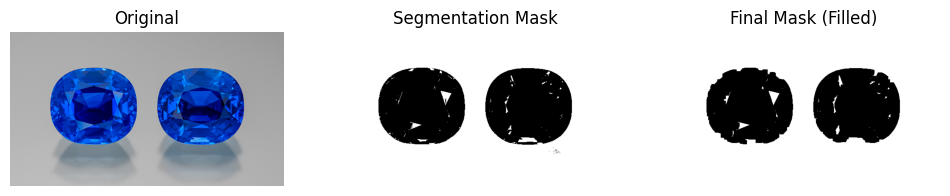

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using a new variable name to avoid conflict
sapphire_img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\sapphire.jpg")

if sapphire_img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

# (a) Segmentation (Otsu on grayscale)
gray = cv2.cvtColor(sapphire_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# (b) Morphological closing (fill holes)
kernel = np.ones((5,5), np.uint8)
filled = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# (c) Connected Components with stats
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(filled)
areas_pixels = stats[1:, cv2.CC_STAT_AREA]  # skip background
print("Areas in pixels:", areas_pixels)

# (d) Compute real-world areas
f = 8      # mm
Z = 480    # mm
scale_factor = (Z / f) ** 2

areas_real = areas_pixels * scale_factor
print("Real-world areas (mm^2):", areas_real)

# ---------- Display ----------
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(sapphire_img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask, cmap="gray"); plt.title("Segmentation Mask"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(filled, cmap="gray"); plt.title("Final Mask (Filled)"); plt.axis("off")
plt.show()
